In [1]:
#importing main libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# target variable analysis

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

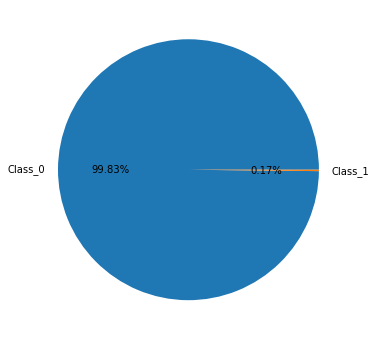

In [8]:
plt.figure(figsize=(12,6))
plt.pie(x=data['Class'].value_counts(),labels=['Class_0','Class_1'],autopct='%1.2f%%');


In [9]:
#As dataset is imbalanced we have to reduce this to balance dataset

In [10]:
missing_values=data.isnull().sum().sort_values()
missing_percent=(data.isnull().sum()/len(data)).sort_values()
missing=pd.concat([missing_values,missing_percent],axis=1,keys=['missing_values','missing_percent'])
print(missing)

        missing_values  missing_percent
Time                 0              0.0
V28                  0              0.0
V27                  0              0.0
V26                  0              0.0
V25                  0              0.0
V24                  0              0.0
V23                  0              0.0
V22                  0              0.0
V21                  0              0.0
V20                  0              0.0
V19                  0              0.0
V18                  0              0.0
V17                  0              0.0
V16                  0              0.0
Amount               0              0.0
V15                  0              0.0
V13                  0              0.0
V12                  0              0.0
V11                  0              0.0
V10                  0              0.0
V9                   0              0.0
V8                   0              0.0
V7                   0              0.0
V6                   0              0.0


In [11]:
#There are no missing values in dataframe

In [12]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [13]:
len(data)-len(data.drop_duplicates())

1081

In [14]:
data.shape

(284807, 31)

In [15]:
data=data.drop_duplicates()

In [16]:
data.shape

(283726, 31)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [18]:
data['Amount'].sort_values()

84293         0.00
219965        0.00
219958        0.00
56576         0.00
23856         0.00
            ...   
54018     11898.09
46841     12910.93
151296    18910.00
58465     19656.53
274771    25691.16
Name: Amount, Length: 283726, dtype: float64

In [19]:
data['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
# lets distribute Amount in Quartile

In [21]:
def quartiles(price):
    if price <=5.6:
        return 'Q1'
    elif 5.6 < price <=22:
        return 'Q2'
    elif 22 <price <=77.51:
        return 'Q3'
    else:
        return 'Q4'

In [22]:
data['Quarter']=data['Amount'].apply(quartiles)

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Quarter
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Q4
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Q1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Q4
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Q4
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Q3


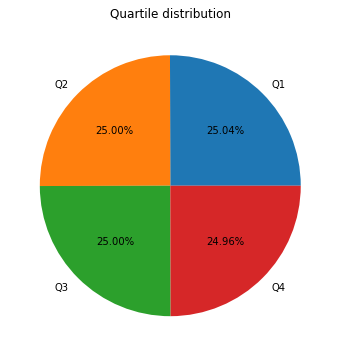

In [24]:
plt.figure(figsize=(12,6))
plt.pie(data['Quarter'].value_counts(),labels=['Q1','Q2','Q3','Q4'],autopct='%1.2f%%')
plt.title('Quartile distribution');

In [25]:
quartile=pd.crosstab(data['Quarter'],data['Class'])
quartile

Class,0,1
Quarter,,
Q1,70727,213
Q2,70988,47
Q3,70775,45
Q4,70763,168


In [26]:
#Quarter 1 has highest number of fraud transaction followed by quarter 2

In [27]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<AxesSubplot:>

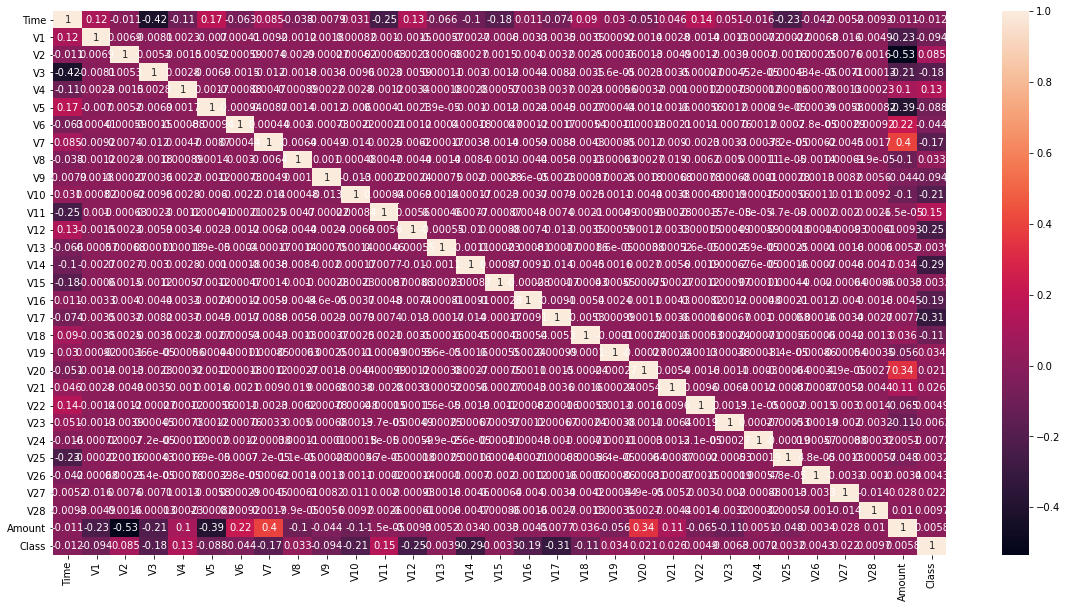

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [29]:
data.corr()['Class']

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

In [30]:
#As all features correlation value is less than 0.8 so feartures are not multicollinear

In [31]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Quarter
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Q4
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Q1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Q4
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Q4
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Q3


In [32]:
data.drop(['Quarter'],axis=1,inplace=True)

In [33]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df=data.copy()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
scale=StandardScaler()
df['Amount']=scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']=scale.fit_transform(df['Time'].values.reshape(-1,1))

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [39]:
X=df.drop(['Class'],axis=1)
y=df['Class']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

In [42]:
#Model selection 

In [43]:
y_train.value_counts()

0    226597
1       383
Name: Class, dtype: int64

In [44]:
y_test.value_counts()

0    56656
1       90
Name: Class, dtype: int64

# Logistic Regression

In [45]:
logistic=LogisticRegression(solver='liblinear',class_weight='balanced',random_state=42)

In [46]:
logistic.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [47]:
y_pred_log=logistic.predict(X_test)

In [48]:
from sklearn.metrics import plot_confusion_matrix, r2_score,mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer,precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score, f1_score,accuracy_score,recall_score
from sklearn.metrics import auc

In [49]:
con_matrix=confusion_matrix(y_test,y_pred_log)
con_matrix

array([[55395,  1261],
       [   10,    80]], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.89      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



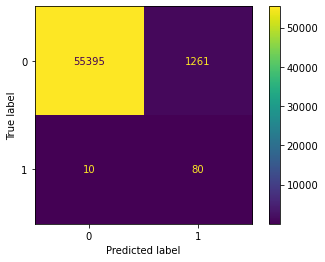

In [51]:
plot_confusion_matrix(logistic,X_test,y_test)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={"class_weight":["balanced",None],
            "penalty":['l1','l2'],
            'solver':['saga','lbfgs']
    
}

In [54]:
log_grid=LogisticRegression(class_weight='balanced',random_state=42)
log_grid_model=GridSearchCV(log_grid,param_grid,scoring='f1',verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [55]:
log_grid_model.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [56]:
log_grid=LogisticRegression(class_weight='balanced',
                           penalty='l2',
                           solver='lbfgs',
                           random_state=42).fit(X_train,y_train)

In [57]:
y_pred = log_grid.predict(X_test)
y_train_pred = log_grid.predict(X_train)


LogReg_tuned_f1 = f1_score(y_test, y_pred)
LogReg_tuned_acc = accuracy_score(y_test, y_pred)
LogReg_tuned_recall = recall_score(y_test, y_pred)
LogReg_tuned_auc = roc_auc_score(y_test, y_pred)
LogReg_tuned_pre = precision_score(y_test, y_pred)
#LogReg_tuned_recall_auc = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
LogReg_tuned_recall_auc = auc(recall, precision)

In [58]:
print(LogReg_tuned_f1)

0.11180992313067785


In [59]:
print(LogReg_tuned_acc)
print(LogReg_tuned_recall)
print(LogReg_tuned_auc)
print(LogReg_tuned_pre)


0.9776019455115779
0.8888888888888888
0.9333158790674324
0.05965697240865026


In [60]:
confusion_matrix(y_test,y_pred)

array([[55395,  1261],
       [   10,    80]], dtype=int64)

# Random Forest

In [61]:
randomforest=RandomForestClassifier()

In [62]:
randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_random=randomforest.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [65]:
confusion_matrix(y_test,y_pred_random)

array([[56654,     2],
       [   24,    66]], dtype=int64)

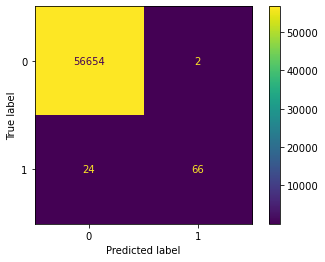

In [66]:
plot_confusion_matrix(randomforest,X_test,y_test)

In [67]:
randomforest.feature_importances_

array([0.01305165, 0.01680401, 0.0145251 , 0.0157928 , 0.02652999,
       0.01182269, 0.01532667, 0.02521633, 0.01511045, 0.04359872,
       0.08618474, 0.06189461, 0.12851878, 0.01136184, 0.11847214,
       0.01102477, 0.05129921, 0.16840526, 0.02974564, 0.01284603,
       0.01270837, 0.01815435, 0.01007452, 0.00708385, 0.01035456,
       0.00928629, 0.02041855, 0.0119413 , 0.01171215, 0.01073463])

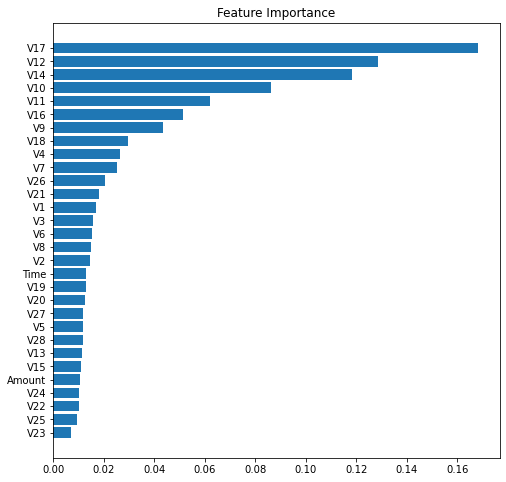

In [68]:
plt.figure(figsize=(8,8))
feature=X_train.columns
importances=randomforest.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices])
plt.yticks(range(len(indices)),[feature[i] for i in indices]);

# Grid SearchCV

In [69]:
param_grid={'n_estimators':[50,100,300],
           'max_features':[2,3,4],
           'max_depth':[3,5,7],
           'min_samples_split':[2,5,8]}

In [70]:
rfgrid=RandomForestClassifier(class_weight='balanced',random_state=42)
rfgrid_model=GridSearchCV(estimator=rfgrid,
                         param_grid=param_grid,
                         scoring='recall',
                         n_jobs=-1,verbose=2)

In [71]:
rfgrid_model.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300]},
             scoring='recall', verbose=2)

In [72]:
rfgrid_model.best_params_

{'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 50}

In [73]:
rfgrid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=3,
                       n_estimators=50, random_state=42)

In [74]:
rftune=RandomForestClassifier(class_weight='balanced',
                             max_depth=3,
                             max_features=3,
                             min_samples_split=2,
                             n_estimators=50).fit(X_train,y_train)

In [75]:
y_pred_random_grid=rftune.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred_random_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.33      0.80      0.47        90

    accuracy                           1.00     56746
   macro avg       0.67      0.90      0.74     56746
weighted avg       1.00      1.00      1.00     56746



In [77]:
confusion_matrix(y_test,y_pred_random_grid)

array([[56513,   143],
       [   18,    72]], dtype=int64)

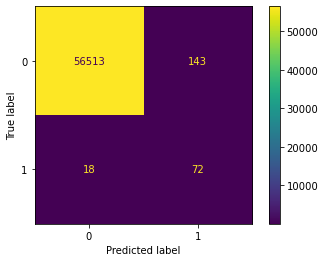

In [78]:
plot_confusion_matrix(rftune,X_test,y_test)

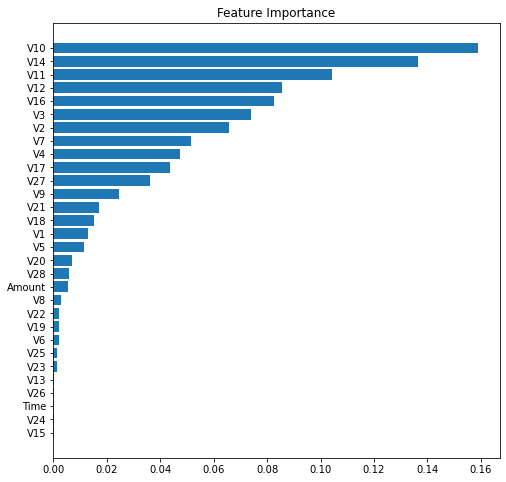

In [79]:
plt.figure(figsize=(8,8))
feature=X_train.columns
importances=rftune.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices])
plt.yticks(range(len(indices)),[feature[i] for i in indices]);

In [80]:
#from above bar graph we can see that feature v28,v27,v20,v26,v13,v22, Time,v15,v25,v24 we can delete and rerun random forest

# SMOTE 

In [81]:
#There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique)
#which we are going to use to make our dataset balanced.

In [82]:
#!pip install imblearn

In [83]:
!pip install -U imbalanced-learn

# Data preprocessing

In [86]:
import imblearn 
#from imblearn import over_samling, under_sampling
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline


In [87]:
from imblearn import over_sampling

In [88]:
from imblearn import under_sampling

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
from imblearn.under_sampling import RandomUnderSampler


In [91]:
from imblearn.pipeline import Pipeline

In [92]:
df_smote=data.copy()

In [93]:
df_smote.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
scaler=StandardScaler()

In [97]:
df_smote['Amount']=scaler.fit_transform(df_smote['Amount'].values.reshape(-1,1))

In [98]:
df_smote['Time']=scaler.fit_transform(df_smote['Time'].values.reshape(-1,1))

In [99]:
df_smote.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996823,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996823,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996802,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996802,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996781,0


In [100]:
X=df_smote.drop(['Class'],axis=1)
y=df_smote['Class']

In [103]:
over=SMOTE(sampling_strategy={1:10000})
under=RandomUnderSampler(sampling_strategy={0:10000})
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X,y=pipeline.fit_resample(X,y)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [106]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13500,0.862438,-1.642915,-0.289803,-3.561546,5.739095,-3.328505,1.039871,1.410220,0.565563,-3.489011,...,2.290961,1.186139,0.576251,2.060914,-0.077697,0.467204,0.583661,-0.067764,0.028513,0.862438
4606,1.171773,2.348954,-1.324198,-1.672687,-1.889897,-0.649906,-0.375295,-0.981088,-0.099241,-1.625141,...,-0.472352,0.064163,0.554287,0.045362,0.175471,0.111719,0.054475,-0.030111,-0.072855,1.171773
5079,1.174153,-1.074886,1.402111,-0.196740,-1.062946,0.037001,0.140912,-0.425795,1.140478,0.045742,...,-0.138197,-0.173896,-0.702416,-0.003576,-0.048512,-0.059373,-0.276390,-0.106066,-0.034015,1.174153
11798,-1.238135,-4.725352,4.879496,-5.812015,4.971024,-4.778036,-1.413856,-7.166356,3.526648,-4.343113,...,0.479463,1.400158,0.052439,-0.020855,-0.054512,-0.128012,-0.102381,0.413182,0.383113,-1.238135
19966,-1.127572,-11.678510,6.332526,-13.301532,7.688238,-10.885202,-2.797698,-12.566706,7.286170,-7.563946,...,-1.004719,2.134126,-1.267615,-0.036323,0.614251,0.346772,-0.424547,-0.691152,-0.817076,-1.127572


In [107]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16000, 30), (4000, 30), (16000,), (4000,))

In [108]:
y_train.value_counts()

0    8000
1    8000
Name: Class, dtype: int64

In [109]:
y_test.value_counts()

0    2000
1    2000
Name: Class, dtype: int64

# Logistic Regression with SMOTE

In [110]:
logsmote=LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)


In [111]:
logsmote.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [112]:
ypred=logsmote.predict(X_test)

In [116]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2000
           1       0.97      0.92      0.94      2000

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [117]:
confusion_matrix(y_test,ypred)

array([[1943,   57],
       [ 170, 1830]], dtype=int64)

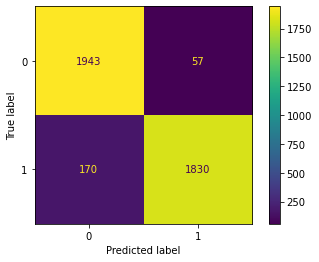

In [118]:
plot_confusion_matrix(logsmote,X_test,y_test)

# Logistic Regression GridSearchCV with SMOTE

In [122]:
param_grid={'class_weight':['balanced',None],
           'penalty':['l1','l2'],
           'solver':['saga','lbfgs']}

In [123]:
logsmotegrid=LogisticRegression(class_weight='balanced',random_state=42)
logsmotegridmodel=GridSearchCV(logsmotegrid,param_grid=param_grid,scoring='f1',verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [125]:
logsmotegridmodel.best_params_

{'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [128]:
logsmotegridmodel.best_estimator_

LogisticRegression(class_weight='balanced', random_state=42)

In [130]:
logsmotegridmodelfinal=LogisticRegression(class_weight='balanced',
                                          penalty='l2',
                                          solver='lbfgs',
                                          random_state=42).fit(X_train,y_train)

In [131]:
ypredgrid=logsmotegridmodelfinal.predict(X_test)

In [132]:
confusion_matrix(y_test,ypredgrid)

array([[1943,   57],
       [ 170, 1830]], dtype=int64)

In [133]:
print(classification_report(y_test,ypredgrid))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2000
           1       0.97      0.92      0.94      2000

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



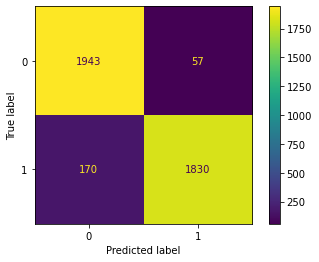

In [136]:
plot_confusion_matrix(logsmotegridmodelfinal,X_test,y_test)

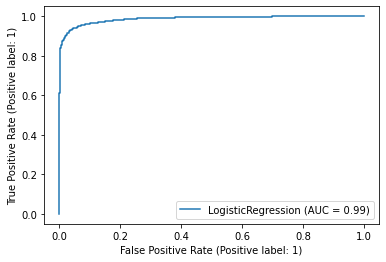

In [137]:
plot_roc_curve(logsmotegridmodelfinal,X_test,y_test)

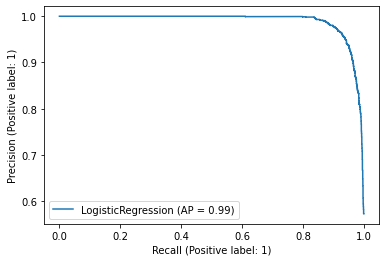

In [138]:
plot_precision_recall_curve(logsmotegridmodelfinal,X_test,y_test)

# Random Forest Classifier with SMOTE

In [140]:
rfmodelsmote=RandomForestClassifier(class_weight='balanced',random_state=42)
rfmodelsmote.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [141]:
y_pred=rfmodelsmote.predict(X_test)

In [142]:
confusion_matrix(y_test,y_pred)

array([[1999,    1],
       [  23, 1977]], dtype=int64)

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2000
           1       1.00      0.99      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



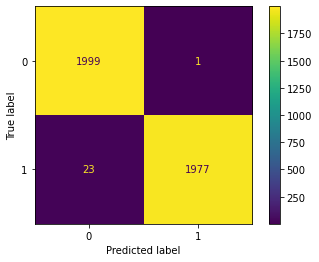

In [144]:
plot_confusion_matrix(rfmodelsmote,X_test,y_test)

# random forest cross validation with smote


In [145]:
param_grid={'n_estimators':[50,100,300],
           'max_features':[2,3,4],
           'max_depth':[3,5,7],
           'min_samples_split':[2,5,8]}

In [146]:
rfsmotegrid=RandomForestClassifier(class_weight='balanced',random_state=42)
rfsmotegridmodel=GridSearchCV(estimator=rfsmotegrid,
                              param_grid=param_grid,
                              scoring='recall',
                              n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [147]:
rfsmotegridmodel.best_params_

{'max_depth': 7, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 50}

In [148]:
rfsmotegridmodel.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [149]:
rfsmotegridmodelfinal=RandomForestClassifier(class_weight='balanced',
                                             max_depth=7,
                                             max_features=4,
                                            min_samples_split=5,
                                            n_estimators=50,
                                             random_state=42).fit(X_train,y_train)
                                             

In [150]:
ypredrfgrid=rfsmotegridmodelfinal.predict(X_test)

In [151]:
confusion_matrix(y_test,ypredrfgrid)

array([[1995,    5],
       [ 164, 1836]], dtype=int64)

In [153]:
print(classification_report(y_test,ypredrfgrid))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2000
           1       1.00      0.92      0.96      2000

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



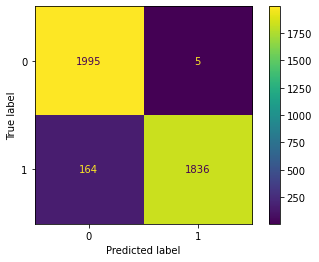

In [154]:
plot_confusion_matrix(rfsmotegridmodelfinal,X_test,y_test)

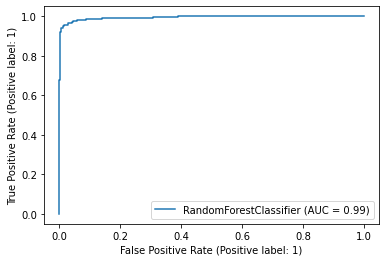

In [157]:
plot_roc_curve(rfsmotegridmodelfinal,X_test,y_test)

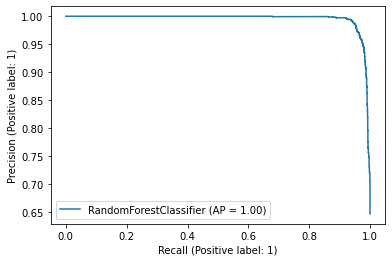

In [158]:
plot_precision_recall_curve(rfsmotegridmodelfinal,X_test,y_test)